### SVM

#### ¿que es?
son modelos de aprendizaje supervisados, con algoritmos de aprendizaje asociados que analizan los datos utilizados para el análisis de clasificación y regresión

#### Vectores de soporte
* Los vectores de soporte son los puntos de la data que estan los mas cerca de la superfice de decisión (hiperplano)

* Son los puntos mas dificiles de clasificar.

* Tiene mucha influencia en la posición de la superficie.

Se busca la separación mas eficiente, encontrar una linea que separe (máxima separación) los dos grupos en la misma distancia de los vectores de soporte.

<img src="support_vectors.png">

Los vectores de soporte son los que tocan las lineas que estan cerca de la frontera de decisión.

Para hacerlo, tenemos imputs y outputs.

Input:

<img src="classes.png">

* Si estamos 1, pertenece a la clase 1
* si estamos en -1 pertenece a la clase 2

Entonces la idea es definir una recta como:

$W_o^TX+b_0 = 1\hspace{1cm} or \hspace{1cm} W_o^TX+b_0 = 0$

Donde $b_0$ es el sesgo.

Se busca maximizar la distancia d, que separa a los vectores de soporte con la frontera de decisión.

<img src="decission_f.png">

Los puntos de lado izquierdo de la imagen pertenecen a 1 y los del lado derecho pertenecen a -1 (0).

Entonces se tiene.

<img src="image_4.png">

Se tiene que.
* $H_1$ Puntos rojos, Y = 1
* $H_2$ Puntos verdes, Y = -1
* Vector b es el sesgo.
*  $H_0$ frontera de decisión.

Deducción.

Si tenemos la recta  $L: AX+By+C = 0$

y el punto $P(X_0, Y_0)$

Encontrar la distancia se define como:

$ d(LP) = \frac{|Ax_0+By_0+C|}{\sqrt{A^2+B^2}}$

Si aplicamos esta formula a la recta $w.x+b$  para encontrar la distancia que hay entre los puntos.

De la ecuanción anterior tenemos que $w.x+b = 1$

$$\frac{|w.x+b|} {|w|} = \frac{1}{|w|} $$

nuestro problema de optimizacion,tenemos que minimizar W.
Sujeto a .
* todos los puntos deben deser mayores o iguales que 1 o menores o iguales que -1.

min $|w|$

s.a.

$\vec{x_i}.\vec{w}+b \geq 1 \ ; y=+1\\
\vec{x_i}.\vec{w}+b \leq -1 \; y=-1$

entonces tenemos que ambas expresiones, se pueden juntar : $y_i|\vec{x_i}.\vec{w}| \geq -1$

La función objetivo queda de la siguiente forma.

se desea minimizar, por conveniencia matematica tenemos:

$\sqrt{w_1^2+w^2_2+...+w^2n} \approx \frac{1}{2} |w_1^2+w^2_2+...+w^2n|$

entonces, tenemos el problema de otpmización no lineal.

min $|w|^2$

s.a.

$y_i|\vec{x_i}.\vec{w}| \geq -1 = 0$

Se puede resolver mediante multiplicadores lagrange.

queremos encontrar w y b.

$L(\vec{w},b) = \frac{1}{2}|w|^2-\displaystyle\sum_{i=1}^{N}\lambda_i[y_i(wx_i+b)-1]$

$L(\vec{w},b) = \frac{1}{2}|w|^2-\displaystyle\sum_{i=1}^{N}\lambda-\displaystyle\sum_{i=1}^{N}\lambda_iy_ib+\displaystyle\sum_{i=0}^{N}$


Tenemos que minimizar el lagragiano con respecto a $\vec{w}$ y b y al mismo tiempo que $\lambda$ sea 0.

$\frac{\partial L}{\partial\vec{w}} = \vec{w} - \displaystyle\sum_{i=1}^{N}\lambda_iy_ix_i=0$

$\frac{\partial L}{\partial b} = - \displaystyle\sum_{i=1}^{N}\lambda_iy_i=0$

obtenemos:

$\vec{w} = \displaystyle\sum_{i=1}^{N}\lambda_iy_ix_i$

$\displaystyle\sum_{i=1}^{N}\lambda_iy_i = 0$

sustituiendo en:

$L(\lambda_i) = \frac{1}{2}|\sum\lambda_iy_ix_i|^2-\displaystyle\sum_{i=0}^{N}\lambda_iy_i[\displaystyle\sum_{i=0}^{N}\lambda_iy_ix].\vec{x_i}+\displaystyle\sum_{i=0}^{N}\lambda_i$

* 
* 
* 

$L(\lambda_i) = \displaystyle\sum_{i=0}^{N}\lambda_i - \frac{1}{2}\displaystyle\sum_{i=0}^{N}\lambda_i\lambda_jy_iy_j(x_i.x_j)$

s.a
$\sum\lambda_iy_i = 0 \  \lambda_i \geq 0 $


### Kernels

Cuando tenemos problemas de clasificación que no se pueden separar con una linea recta.

Los métodos kernel siguen una aproximación distinta en
la que se realiza (habitualmente de manera implícita) una
expansión de la dimensionalidad, se cambia el espacio para encontrar una linea que clasifique los datos.

Se podría resolver de la siguiente manera.

<img src="image_5.png">



ref: https://www.youtube.com/watch?v=P5lJTUXlTIY&feature=youtu.be
ref: https://www.youtube.com/watch?v=7wBeXw4hIEg

### Ejemplo con tensorboard y dataset del proyecto

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics

In [297]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [298]:
X_train = np.array(pd.read_csv('https://raw.githubusercontent.com/marlonSamuel/StatisticalLearningProject/master/X_train.csv'))
Y_train = np.array(pd.read_csv('https://raw.githubusercontent.com/marlonSamuel/StatisticalLearningProject/master/Y_train.csv'))
X_valid = np.array(pd.read_csv('https://raw.githubusercontent.com/marlonSamuel/StatisticalLearningProject/master/X_valid.csv'))
Y_valid = np.array(pd.read_csv('https://raw.githubusercontent.com/marlonSamuel/StatisticalLearningProject/master/Y_valid.csv'))

In [299]:
#x_vals = np.array([[x[0], x[3]] for x in iris.data])
x_train = np.array(X_train)
x_test = np.array(X_valid)
y_train = np.array([1 if y==0 else -1 for y in Y_train])
y_test = np.array([1 if y==0 else -1 for y in Y_valid])

In [300]:
x_test.shape

(143, 6)

In [305]:
batch_size = 100
tf.reset_default_graph()
x_data = tf.placeholder(shape=None, dtype=tf.float32,name='X')
y_target = tf.placeholder(shape=None, dtype=tf.float32,name='Y')

tf.random.set_random_seed(19)
A = tf.Variable(tf.random_normal(shape=[6,1]),name="A")
b = tf.Variable(tf.random_normal(shape=[1,1]),name="b")

with tf.name_scope("model_output") as scope:
    model_output = tf.subtract(tf.matmul(x_data, A), b,name="model_o")

with tf.name_scope("loss") as scope:    
    l2_norm = tf.reduce_sum(tf.square(A),name="norm")
    alpha = tf.constant([0.1],name="alpha")
    classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1.,tf.multiply(model_output, y_target))),name="classification")
    loss = tf.add(classification_term, tf.multiply(alpha, l2_norm),name="loss_function")

with tf.name_scope("prediction") as scope:
    prediction = tf.sign(model_output)

with tf.name_scope("optimizer") as scope:
    optimizer = tf.train.GradientDescentOptimizer(0.09).minimize(loss)
init = tf.global_variables_initializer()

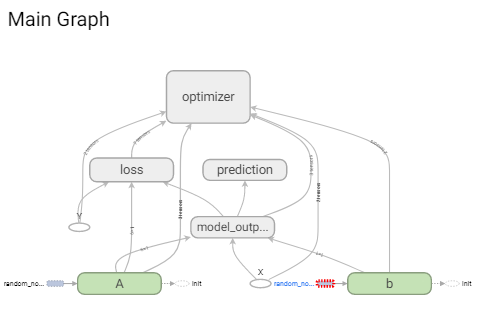

In [307]:
from IPython.display import Image
Image('main_graph.png')

In [306]:
loss_vec = []
prediction_train = []
prediction_test = []
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./logs', sess.graph)
    for i in range(5000):
        rand_index = np.random.choice(len(x_train), size=batch_size)
        X = x_train[rand_index]
        Y = np.transpose([y_train[rand_index]])
        sess.run(optimizer, feed_dict={x_data: X, y_target: Y})
        temp_loss = sess.run(loss, feed_dict={x_data: X, y_target: Y})
        loss_vec.append(temp_loss)
    prediction_train = sess.run(prediction,feed_dict={x_data:x_train,y_target: y_train})
    prediction_test = sess.run(prediction,feed_dict={x_data:x_test,y_target: y_test})
    

In [294]:
##Accuracy 
print("accuracy train")
y_acc_train = [1 if y==-1 else 0 for y in prediction_train]
metrics.accuracy_score(Y_train,y_acc_train)

accuracy train


0.7820738137082601

In [295]:
#Accuracy test
print("accuracy test")
y_acc_test = [1 if y==-1 else 0 for y in prediction_test]
metrics.accuracy_score(Y_valid,y_acc_test)

accuracy test


0.7972027972027972